In [6]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from matplotlib import dates
import pandas_ta as ta
import plotly.graph_objects as go
import plotly.express as px
from ta.momentum import RSIIndicator
from prophet import Prophet
from prophet.plot import plot_plotly, plot_components_plotly
import yfinance
from datetime import datetime
from datetime import date,timedelta
import yfinance as yf

In [7]:
today = date.today()

d1 = today.strftime('%Y-%m-%d')
end_date = d1
d2 = date.today() - timedelta(days=2555)
d2 = d2.strftime('%Y-%m-%d')
start_date = d2

In [8]:
ticker = ('CT=F')
stock_data = yf.download(ticker, start = start_date, end = end_date, progress=False, auto_adjust=False, interval='1d').round(4)
if isinstance(stock_data.columns, pd.MultiIndex):
    stock_data.columns = stock_data.columns.droplevel(1)
stock_data


Price,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,
2018-04-23,83.19,83.19,86.44,82.90,85.70,3444
2018-04-24,82.26,82.26,84.47,82.93,83.25,246
2018-04-25,84.76,84.76,84.57,82.89,83.17,19
2018-04-26,84.99,84.99,85.00,84.63,85.00,6
2018-04-27,85.33,85.33,85.33,85.33,85.33,0
...,...,...,...,...,...,...
2025-04-11,65.89,65.89,67.14,65.56,66.40,33635
2025-04-14,64.09,64.09,66.10,63.75,66.00,13358
2025-04-15,65.08,65.08,65.14,63.83,64.25,11328


In [9]:
#Chekc if data is ame for Adj Close and Close
stock_data['Adj Close'].equals(stock_data['Close'])

True

Technical analsyis
-RSI
-MACD
-BB
-MA Analysis

In [10]:
#Last 90 days
stock_data_90 = stock_data.iloc[-90:]

#Last 60 days
stock_data_60 = stock_data.iloc[-60:].copy()
stock_data_60['RSI'] = ta.rsi(stock_data_60['Adj Close'], length=14)

#Last 30 days
stock_data_30 = stock_data.iloc[-30:]

Charts

In [11]:
#Price line chart of all data
fig = go.Figure(data=[go.Scatter(x=stock_data_90.index, y=stock_data_90['Adj Close'], mode='lines', name='Adj Close')])
fig.update_layout(
    xaxis_rangeslider_visible=False,
    yaxis_title='Cotton Price in USD',
    xaxis_title='Date',
    plot_bgcolor='lightgrey',
    width=1050,
    height=600
)
fig.show()

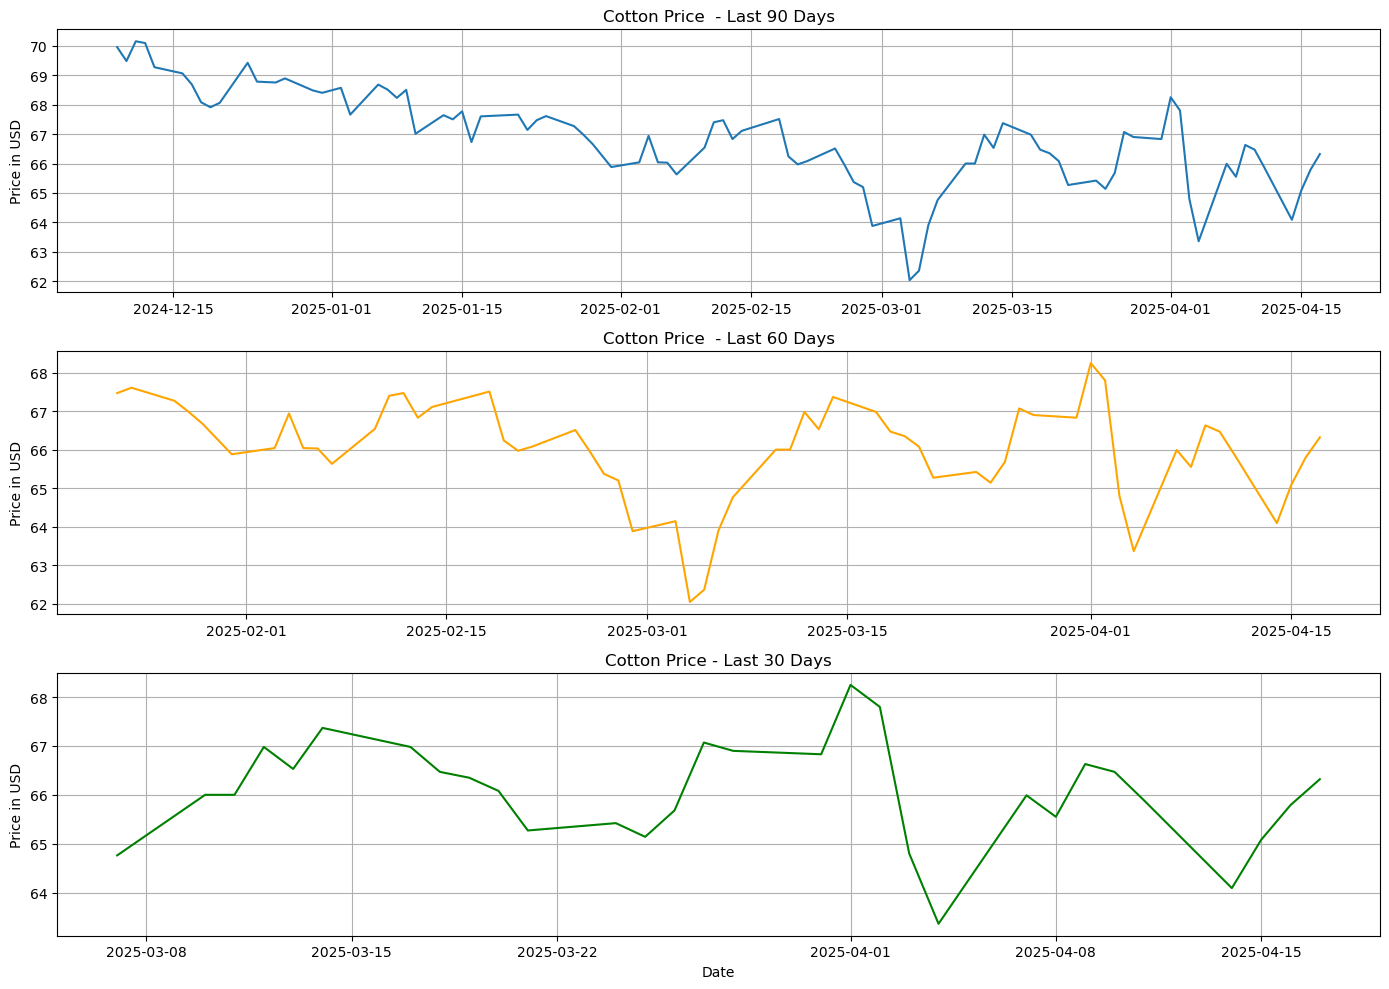

In [12]:
plt.figure(figsize=(14,10))

# --- 1. Last 90 Days ---
plt.subplot(3, 1, 1)
plt.plot(stock_data_90.index, stock_data_90['Adj Close'], label='Last 90 Days')
plt.title('Cotton Price  - Last 90 Days')
plt.ylabel('Price in USD')
plt.grid(True)

# --- 2. Last 60 Days ---
plt.subplot(3, 1, 2)
plt.plot(stock_data_60.index, stock_data_60['Adj Close'], label='Last 60 Days', color='orange')
plt.title('Cotton Price  - Last 60 Days')
plt.ylabel('Price in USD')
plt.grid(True)

# --- 3. Last 30 Days ---
plt.subplot(3, 1, 3)
plt.plot(stock_data_30.index, stock_data_30['Adj Close'], label='Last 30 Days', color='green')
plt.title('Cotton Price - Last 30 Days')
plt.ylabel('Price in USD')
plt.xlabel('Date')
plt.grid(True)

plt.tight_layout()
plt.show()

RSI

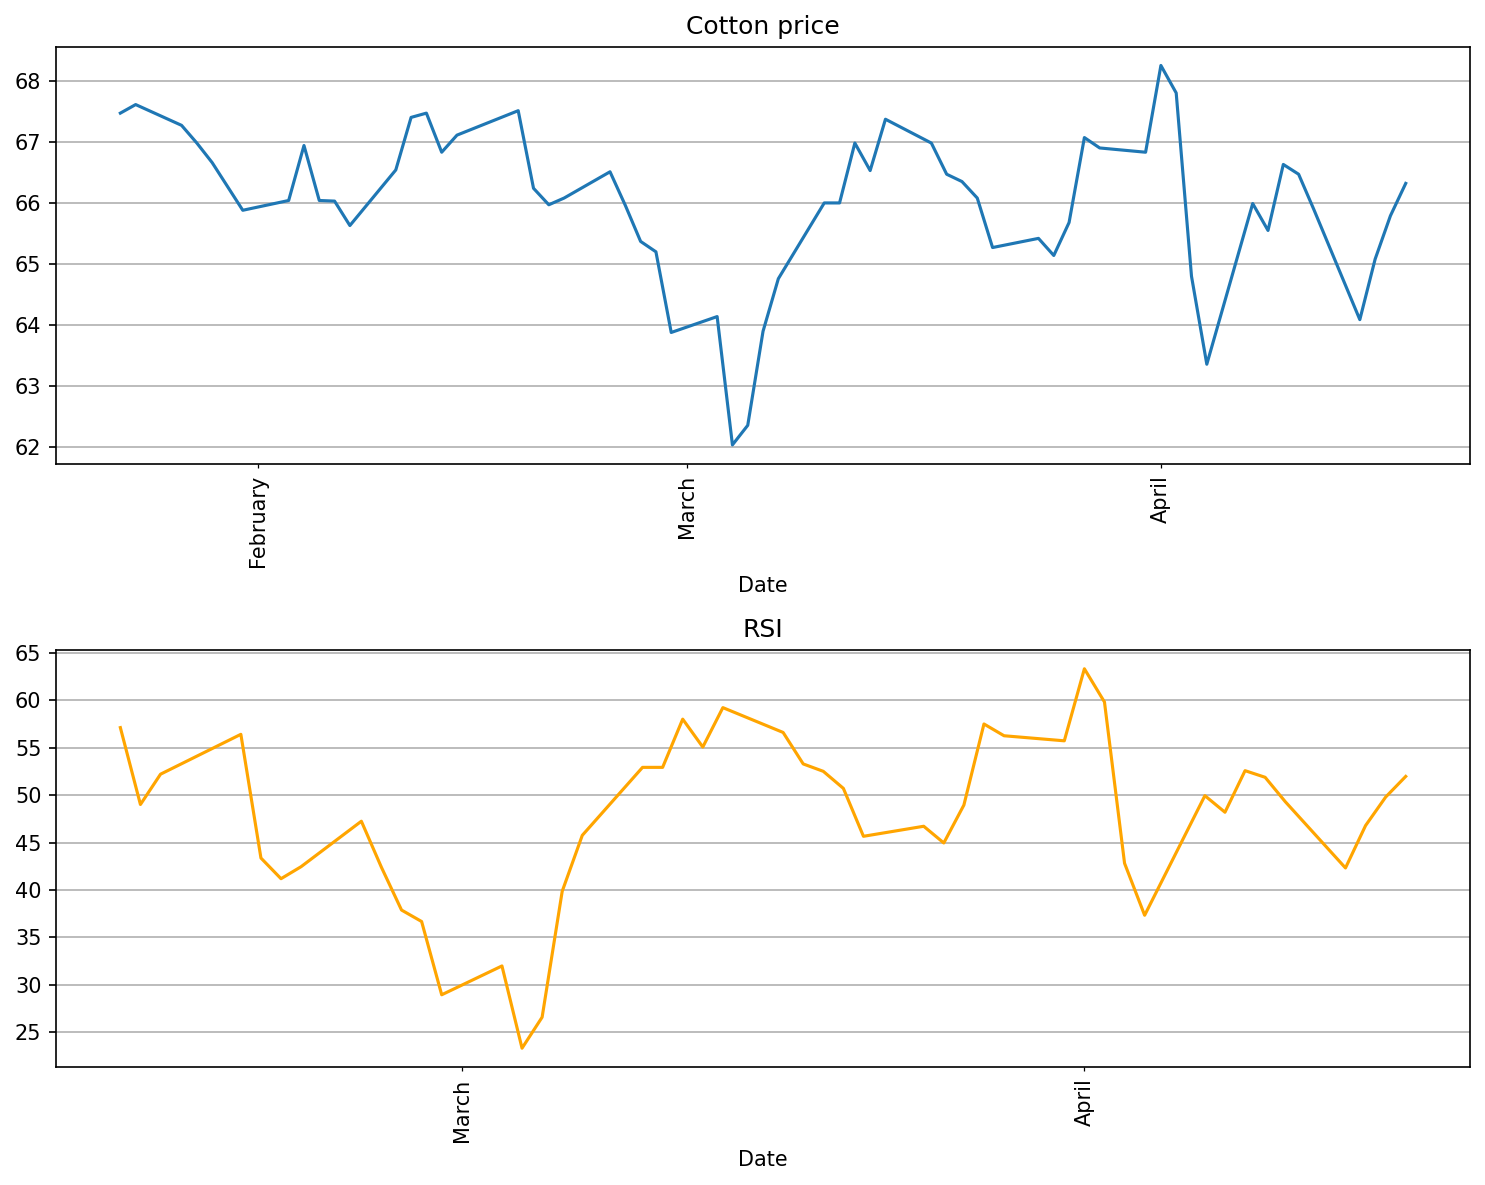

In [13]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(10,8), dpi=150)
stock_data_60['Adj Close'].plot(ax=ax[0])
ax[0].set_title('Cotton price')
ax[0].xaxis.set_major_locator(dates.YearLocator())
ax[0].xaxis.set_major_formatter(dates.DateFormatter('%Y       %B'))
ax[0].tick_params(axis='x', which = 'major', rotation = 90)
ax[0].xaxis.set_minor_locator(dates.MonthLocator())
ax[0].xaxis.set_minor_formatter(dates.DateFormatter('%B'))
ax[0].tick_params(axis='x', which = 'minor', rotation = 90)

ax[0].xaxis.grid()
ax[0].yaxis.grid()

#RSI
stock_data_60['RSI'].plot(ax=ax[1], c='orange')
ax[1].set_title('RSI')
ax[1].xaxis.set_major_locator(dates.YearLocator())
ax[1].xaxis.set_major_formatter(dates.DateFormatter('%Y       %B'))
ax[1].tick_params(axis='x', which = 'major', rotation = 90)
ax[1].xaxis.set_minor_locator(dates.MonthLocator())
ax[1].xaxis.set_minor_formatter(dates.DateFormatter('%B'))
ax[1].tick_params(axis='x', which = 'minor', rotation = 90)

ax[1].xaxis.grid()
ax[1].yaxis.grid()

plt.tight_layout()
plt.show()

In [14]:
#Stand alone RSI - use 46 days for clear view. (THIS DO NOT CHANGE THE ANALYSIS DO NO USE IT LATER)
stock_data_46 = stock_data_60.tail(46)

fig = go.Figure(data=[go.Scatter(
    x=stock_data_46.index,
    y=stock_data_46['RSI'],
    mode='lines',
    name='RSI'
)])

fig.update_layout(
    xaxis_rangeslider_visible=False,
    yaxis_title='RSI',
    xaxis_title='Date',
    plot_bgcolor='lightgrey',
    width=1050,
    height=600
)

fig.show()

In [15]:
def compute_macd(df, short_period=12, long_period=26, signal_period=9):
    macd = ta.macd(df['Close'], fast=short_period, slow=long_period, signal=signal_period)
    df = df.copy()
    df['MACD'] = macd[f'MACD_{short_period}_{long_period}_{signal_period}']
    df['Signal'] = macd[f'MACDs_{short_period}_{long_period}_{signal_period}']
    df['MACD_Histogram'] = macd[f'MACDh_{short_period}_{long_period}_{signal_period}']
    return df

# --- 2. Get last 90 days and compute MACD ---
stock_data_90 = stock_data_90.tail(90).copy()
stock_data_90 = compute_macd(stock_data_90)

# --- 3. Drop rows with NaNs from MACD (caused by moving average warm-up) ---
stock_data_90_clean = stock_data_90.dropna(subset=['MACD', 'Signal', 'MACD_Histogram'])

# --- 4. Color-coded histogram bars ---
bar_colors = ['green' if val >= 0 else 'red' for val in stock_data_90_clean['MACD_Histogram']]

# --- 5. Plot ---
fig = go.Figure()

# MACD Line
fig.add_trace(go.Scatter(
    x=stock_data_90_clean.index,
    y=stock_data_90_clean['MACD'],
    mode='lines',
    name='MACD Line',
    line=dict(color='blue', width=2),
    yaxis='y1'
))

# Signal Line
fig.add_trace(go.Scatter(
    x=stock_data_90_clean.index,
    y=stock_data_90_clean['Signal'],
    mode='lines',
    name='Signal Line',
    line=dict(color='orange', width=2),
    yaxis='y1'
))

# Histogram
fig.add_trace(go.Bar(
    x=stock_data_90_clean.index,
    y=stock_data_90_clean['MACD_Histogram'],
    name='MACD Histogram',
    marker_color=bar_colors,
    opacity=0.5,
    yaxis='y1'
))

# Price Line
fig.add_trace(go.Scatter(
    x=stock_data_90_clean.index,
    y=stock_data_90_clean['Adj Close'],
    name='Price Line',
    mode='lines',
    line=dict(color='black', width=2, dash='dot'),
    yaxis='y2'
))

# --- 6. Layout ---
fig.update_layout(
    title='MACD & Price (Last 90 Days)',
    xaxis_title='Date',
    plot_bgcolor='lightgrey',
    xaxis_rangeslider_visible=False,
    width=1050,
    height=600,
    legend=dict(
        orientation='h',
        yanchor='bottom',
        y=1.02,
        xanchor='right',
        x=1
    ),
    yaxis=dict(
        title='MACD',
        side='left',
        showgrid=True
    ),
    yaxis2=dict(
        title='Price (Adj Close)',
        overlaying='y',
        side='right',
        showgrid=False
    )
)

fig.show()

In [16]:
# Standard Bollinger Bands settings
boll_window = 10

# Moving Averages
stock_data_90['M10'] = stock_data_90['Close'].rolling(window=10).mean()
stock_data_90['M20'] = stock_data_90['Close'].rolling(window=boll_window).mean()

# Standard Deviation & Bands
stock_data_90['SD'] = stock_data_90['Close'].rolling(window=boll_window).std()
stock_data_90['UB'] = stock_data_90['M20'] + 2 * stock_data_90['SD']
stock_data_90['LB'] = stock_data_90['M20'] - 2 * stock_data_90['SD']

# Drop NaNs for clean plotting
stock_data_90_clean = stock_data_90.dropna(subset=['UB', 'LB', 'M20'])

# --- Plot Bollinger Bands ---
fig = go.Figure()

# Upper Band
fig.add_trace(go.Scatter(
    x=stock_data_90_clean.index,
    y=stock_data_90_clean['UB'],
    mode='lines',
    name='Upper Band',
    line=dict(color='red')
))

# Lower Band
fig.add_trace(go.Scatter(
    x=stock_data_90_clean.index,
    y=stock_data_90_clean['LB'],
    mode='lines',
    name='Lower Band',
    fill='tonexty',
    line=dict(color='green')
))

# Middle Band (MA20)
fig.add_trace(go.Scatter(
    x=stock_data_90_clean.index,
    y=stock_data_90_clean['M20'],
    mode='lines',
    name='Middle Band',
    line=dict(color='blue')
))

# Price Line
fig.add_trace(go.Scatter(
    x=stock_data_90_clean.index,
    y=stock_data_90_clean['Close'],
    mode='lines',
    name='Price',
    line=dict(color='black')
))

# Layout
fig.update_layout(
    title=f'{ticker} Bollinger Bands (Window = {boll_window})',
    xaxis_title='Date',
    yaxis_title='Price',
    plot_bgcolor='lightgrey',
    xaxis_rangeslider_visible=False,
    width=1050,
    height=600
)

fig.show()


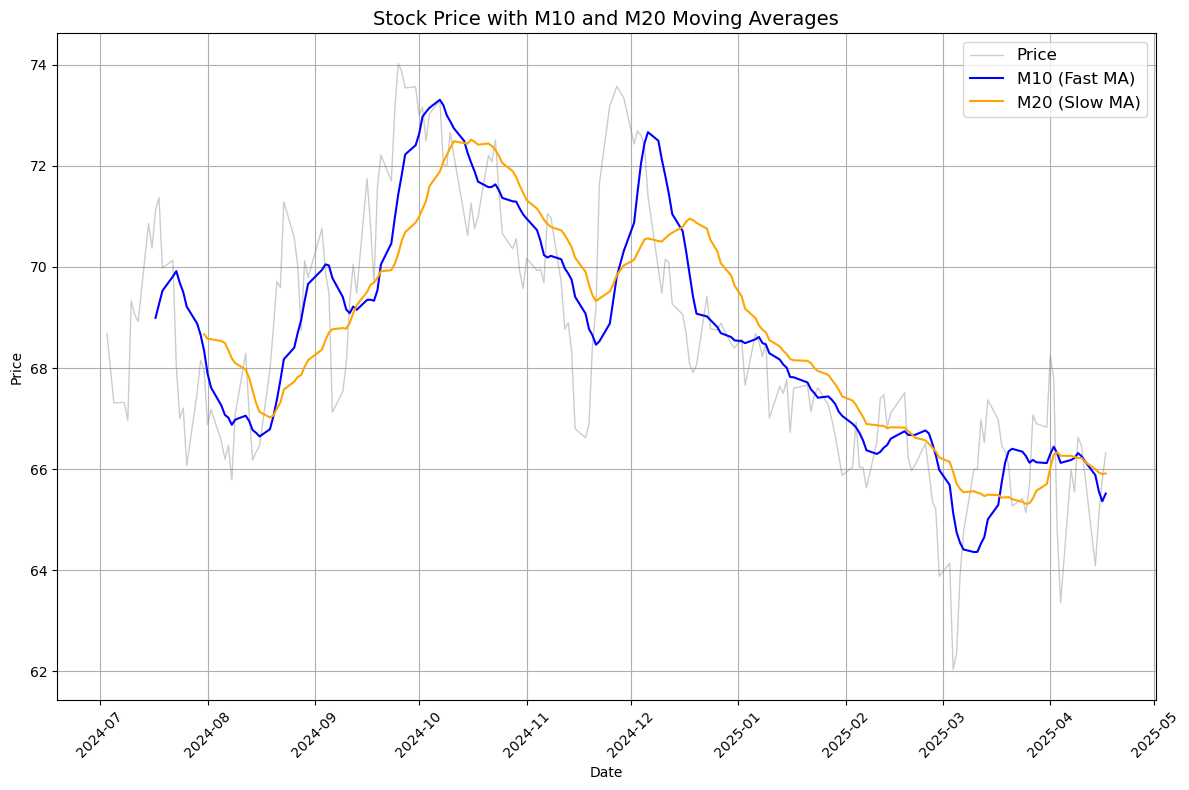

In [17]:
stock_data_200 = stock_data.tail(200).copy()
stock_data_200['M10'] = stock_data_200['Close'].rolling(window=10).mean()
stock_data_200['M20'] = stock_data_200['Close'].rolling(window=20).mean()

# Plot
plt.figure(figsize=(12, 8))

# Price
plt.plot(stock_data_200.index, stock_data_200['Close'], label='Price', color='gray', linewidth=1, alpha=0.4)

# M10 and M20 Moving Averages
plt.plot(stock_data_200.index, stock_data_200['M10'], label='M10 (Fast MA)', color='blue', linewidth=1.5)
plt.plot(stock_data_200.index, stock_data_200['M20'], label='M20 (Slow MA)', color='orange', linewidth=1.5)

# Final touches
plt.title('Stock Price with M10 and M20 Moving Averages', fontsize=14)
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend(fontsize=12)
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()